<a href="https://colab.research.google.com/github/Seeethy/Math-behind-cassino-slots/blob/main/Slots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

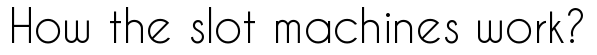

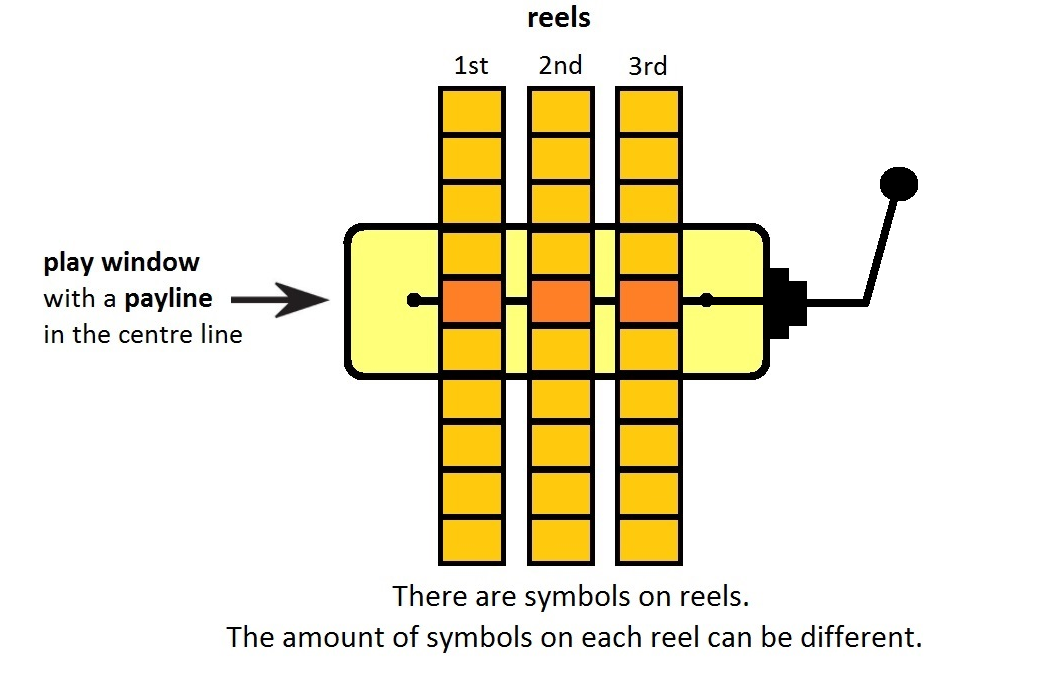



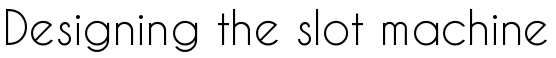

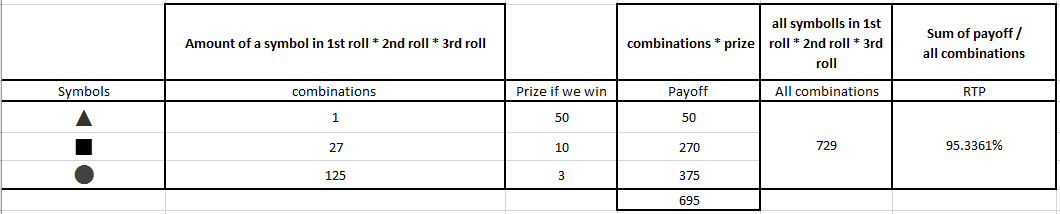

RTP level is equal to:  0.953360768175583
Chance of getting three same symbols:  0.20987654320987653


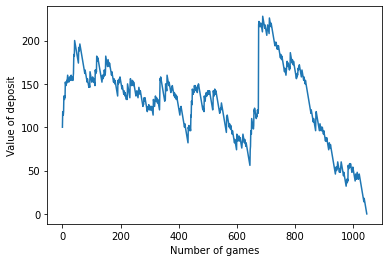

In [84]:
import time # for time.sleep(number)
import random
import sys # for sys.exit() 
import os
import matplotlib.pyplot as plt
from collections import Counter

def Machine1(): # Its a machine with one payline.
  global deposit
  deposit = 100
  deposit_at_start = deposit
  global reel1,reel2,reel3
  reel1 = [ ' ⚫ ' , ' ⬛ ' , ' ▲ ', ' ⚫ ', ' ⬛ ', ' ⬛ ' , ' ⚫ ', ' ⚫ ', ' ⚫ ']
  reel2 = [ ' ⚫ ' , ' ⬛ ' , ' ▲ ', ' ⚫ ', ' ⬛ ', ' ⬛ ' , ' ⚫ ', ' ⚫ ', ' ⚫ ']
  reel3 = [ ' ⚫ ' , ' ⬛ ' , ' ▲ ', ' ⚫ ', ' ⬛ ', ' ⬛ ' , ' ⚫ ', ' ⚫ ', ' ⚫ ']
  game_counter = 0
  game_counter_list = []
  game_counter_list.append(game_counter)
  deposit_list = []
  deposit_list.append(deposit)
  while deposit >= 2:
  #for i in range(10):
    machine = [] # randomly chosing three elements. Its how the typical slot with 1 payline work!
    machine.append(random.choice(reel1)) 
    machine.append(random.choice(reel2))
    machine.append(random.choice(reel3))
              
    money = 2
    deposit -=money

    if ( machine[0] == ' ▲ ' and machine[1] == ' ▲ ' and machine[2] == ' ▲ ' ):            
      #print("\nYou win",money*50,"$","!") 
      deposit = deposit + money*50
      #print(deposit)
      deposit_list.append(deposit)
    elif ( machine[0] == ' ⬛ ' and machine[1] == ' ⬛ ' and machine[2] == ' ⬛ ' ):            
      #print("\nYou win",money*5,"$","!") 
      deposit = deposit + money*10
      #print(deposit)
      deposit_list.append(deposit)
    elif ( machine[0] == ' ⚫ ' and machine[1] == ' ⚫ ' and machine[2] == ' ⚫ ' ):            
      #print("\nYou win",money*4,"$","!") 
      deposit = deposit + money*3
      #print(deposit)
      deposit_list.append(deposit)
    else:
      #print("\nYou lose!")       
      #deposit = deposit - money
      #print(deposit)
      deposit_list.append(deposit)
    game_counter += 1
    game_counter_list.append(game_counter)
    #print("depozyt:",deposit)
    if game_counter == 10000:
      break
  return game_counter_list, deposit_list

winnings = {
  ' ▲ ': 50,
  ' ⬛ ': 10,
  ' ⚫ ': 3
}

def making_statistics(reel1,reel2,reel3): 
  count_reel1 = dict(Counter(reel1).items())
  count_reel2 = dict(Counter(reel2).items())
  count_reel3 = dict(Counter(reel3).items())
  #print(count_reel1,count_reel2,count_reel3)
  number_of_combinations = len(reel1) * len(reel2) * len(reel3)
  payoff = 0
  chance_of_get_3_same_symbols = 0
  for x in count_reel1.keys():
    if x == ' ⚫ ' and x in winnings.keys():
      payoff += count_reel1[x] * count_reel2[x] * count_reel3[x] * winnings[x]
      chance_of_get_3_same_symbols += count_reel1[x] * count_reel2[x] * count_reel3[x]
      #print(count_reel1[x],count_reel2[x],count_reel3[x],winnings[x] )
      #print(payoff)
    if x == ' ⬛ ' and x in winnings.keys():
      payoff += count_reel1[x] * count_reel2[x] * count_reel3[x] * winnings[x]
      chance_of_get_3_same_symbols += count_reel1[x] * count_reel2[x] * count_reel3[x]
      #print(payoff)
    if x == ' ▲ ' and x in winnings.keys():
      payoff += count_reel1[x] * count_reel2[x] * count_reel3[x] * winnings[x]
      chance_of_get_3_same_symbols += count_reel1[x] * count_reel2[x] * count_reel3[x]
      #print(payoff)

  RTP = payoff / number_of_combinations
  chance_of_get_3_same_symbols = chance_of_get_3_same_symbols / number_of_combinations
  return RTP, chance_of_get_3_same_symbols


x_for_pyplot, y_for_pyplot = Machine1()
RTP_level, same_symbols = making_statistics(reel1, reel2, reel3)


print("RTP level is equal to: ", RTP_level)
print("Chance of getting three same symbols: ", same_symbols)
plt.plot(x_for_pyplot, y_for_pyplot)
plt.xlabel("Number of games")
plt.ylabel("Value of deposit")
plt.show()
